In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, tensor, qeye, sigmax, mesolve, fidelity

Revivals of the Z_2 state

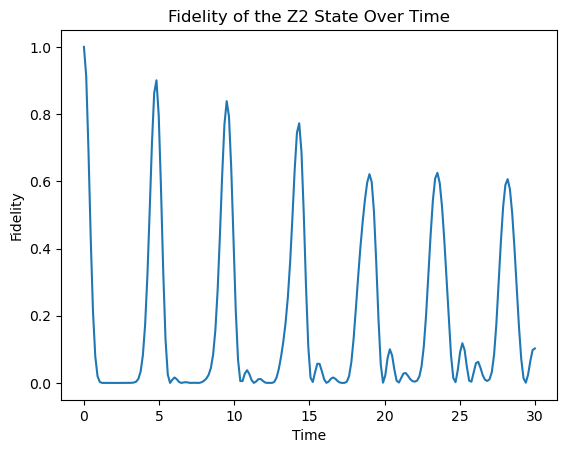

In [20]:
# Define parameters
N = 8  # Number of sites, modify as needed
Omega = 1.0  # PXP term strength

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the initial Z2 state with excitation on every other site
Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H_PXP, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

# Plot the fidelity over time
plt.plot(tlist, fidelities)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of the Z2 State Over Time')
plt.show()

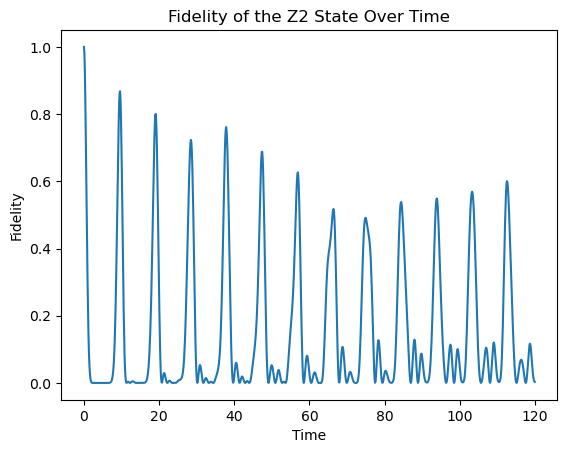

In [29]:
# Define parameters
N = 10  # Number of sites, modify as needed
Omega = 0.5  # PXP term strength

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the initial Z2 state with excitation on every other site
Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, 120, 1000)  # Time array, modify as needed

# Evolve the system
result = mesolve(H_PXP, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

# Plot the fidelity over time
plt.plot(tlist, fidelities)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of the Z2 State Over Time')
plt.show()

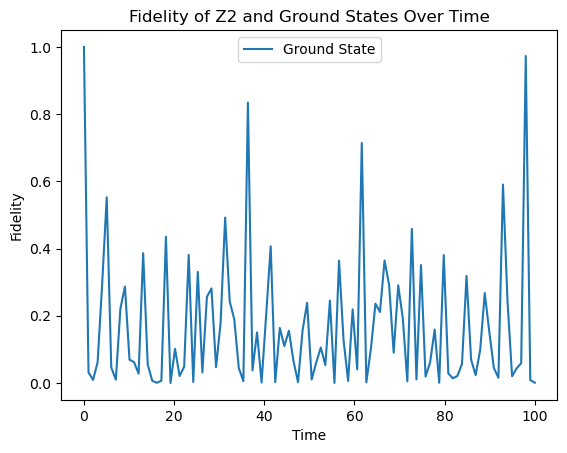

In [14]:
# Define parameters
N = 8  # Number of sites, modify as needed
Omega = 1.5  # PXP term strength
t_max = 100  # Maximum time for evolution
n_steps = 100  # Number of time steps

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega


# Define the initial ground state
ground_state = tensor([basis(2, 0) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array, modify as needed

# Evolve the system for ground state
result_ground = mesolve(H_PXP, ground_state, tlist, [])

# Calculate fidelity with the initial ground state
fidelities_ground = [np.abs(ground_state.overlap(state))**2 for state in result_ground.states]

# Plot the fidelity over time for both states
plt.plot(tlist, fidelities_ground, label='Ground State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Ground States Over Time')
plt.legend()
plt.show()

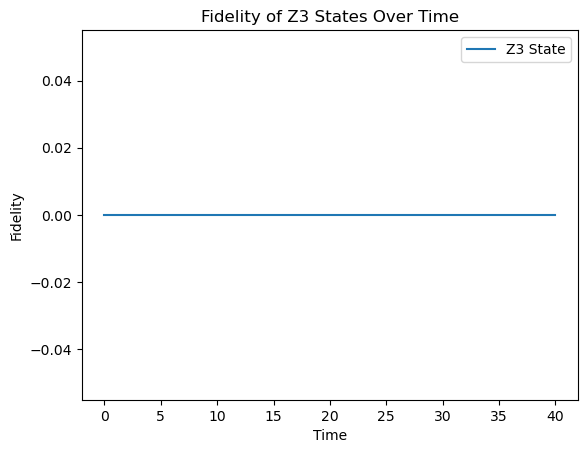

In [17]:
# Define parameters
N = 10  # Number of sites, must be a multiple of 3 for Z3 state
Omega = 1.0  # PXP term strength
t_max = 40  # Maximum time for evolution
n_steps = 100  # Number of time steps

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the initial Z2 state with excitation on every other site
#Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Define the initial Z3 state with pattern 001
Z3_state = tensor([basis(2, (i % 3 == 2)) for i in range(N)])

# Define the initial ground state
#ground_state = tensor([basis(2, 0) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array, modify as needed

# Evolve the system for Z2 state
#result_Z2 = mesolve(H_PXP, Z2_state, tlist, [])

# Evolve the system for Z3 state
result_Z3 = mesolve(H_PXP, Z3_state, tlist, [])

# Evolve the system for ground state
#result_ground = mesolve(H_PXP, ground_state, tlist, [])

# Calculate fidelity with the initial Z2 state
#fidelities_Z2 = [np.abs(Z2_state.overlap(state))**2 for state in result_Z2.states]

# Calculate fidelity with the initial Z3 state
fidelities_Z3 = [np.abs(Z3_state.overlap(state))**2 for state in result_Z3.states]

# Calculate fidelity with the initial ground state
#fidelities_ground = [np.abs(ground_state.overlap(state))**2 for state in result_ground.states]

# Plot the fidelity over time for all three states
#plt.plot(tlist, fidelities_Z2, label='Z2 State')
plt.plot(tlist, fidelities_Z3, label='Z3 State')
#plt.plot(tlist, fidelities_ground, label='Ground State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z3 States Over Time')
plt.legend()
plt.show()

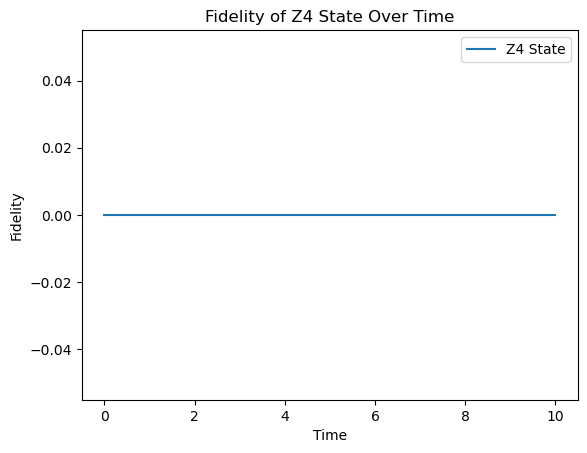

In [18]:
# Define parameters
N = 8  # Number of sites, must be a multiple of 4 for Z4 state
Omega = 1.0  # PXP term strength
t_max = 10  # Maximum time for evolution
n_steps = 100  # Number of time steps

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the initial Z4 state with pattern 0001
Z4_state = tensor([basis(2, (i % 4 == 3)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array

# Evolve the system for Z4 state
result_Z4 = mesolve(H_PXP, Z4_state, tlist, [])

# Calculate fidelity with the initial Z4 state
fidelities_Z4 = [np.abs(Z4_state.overlap(state))**2 for state in result_Z4.states]

# Plot the fidelity over time for Z4 state
plt.plot(tlist, fidelities_Z4, label='Z4 State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z4 State Over Time')
plt.legend()
plt.show()

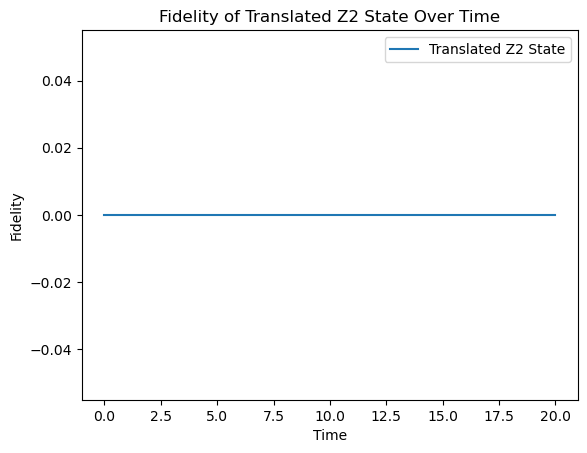

In [23]:
# Define parameters
N = 10  # Number of sites, modify as needed
Omega = 1.0  # PXP term strength
t_max = 20  # Maximum time for evolution
n_steps = 100  # Number of time steps

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the initial translated Z2 state with excitation on every other site, starting with 1
translated_Z2_state = tensor([basis(2, (i % 2 == 1)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array

# Evolve the system for translated Z2 state
result_translated_Z2 = mesolve(H_PXP, translated_Z2_state, tlist, [])

# Calculate fidelity with the initial translated Z2 state
fidelities_translated_Z2 = [np.abs(translated_Z2_state.overlap(state))**2 for state in result_translated_Z2.states]

# Plot the fidelity over time for translated Z2 state
plt.plot(tlist, fidelities_translated_Z2, label='Translated Z2 State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Translated Z2 State Over Time')
plt.legend()
plt.show()